----

# **Demonstrate K-Nearest Neighbour Classification Algorithm**

## **Author**   :  **Muhammad Adil Naeem**

## **Contact**   :   **madilnaeem0@gmail.com**
<br>

----

### **Importing Libraries**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### **Load the Dataset**

In [25]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

### **First 5 rows of Dataset**

In [26]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### **Detailed Information Of Dataset**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### **Check For Missing Values**

In [28]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


### **Statistical Description of Numerical Columns**

In [29]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### **Number of People Purchased**

In [30]:
df['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


### **Create a Dummy Variabe for gender**

In [31]:
gender  = pd.get_dummies(df['Gender'], drop_first=True)
df = pd.concat([df, gender], axis=1)

### **Drop Gender Column**
- Since we have converteed it into dummy variable

In [32]:
df.drop('Gender', axis=1, inplace=True)

In [33]:
df.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True


### **Splittting Data into X and y Variable**

In [34]:
X = df[['Age', 'EstimatedSalary', 'Male']]
y = df['Purchased']

### **Let's Standardized Data**
- We will use standardscaler to bring data on same scale.

In [35]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [36]:
scaled_features = scaler.transform(X)
scaled_features

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

### **Make a new Scaled Dataframe**

In [37]:
df_feat = pd.DataFrame(scaled_features, columns=X.columns)
df_feat.head()

,Age,EstimatedSalary,Male
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204


### **Splittting Data into Train and Text Variable**

In [57]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2)

### **Fit K-NN Model**

In [58]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### **Make Prediction**

In [59]:
y_pred = knn.predict(X_test)

### **Evaluate the Model**

In [60]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

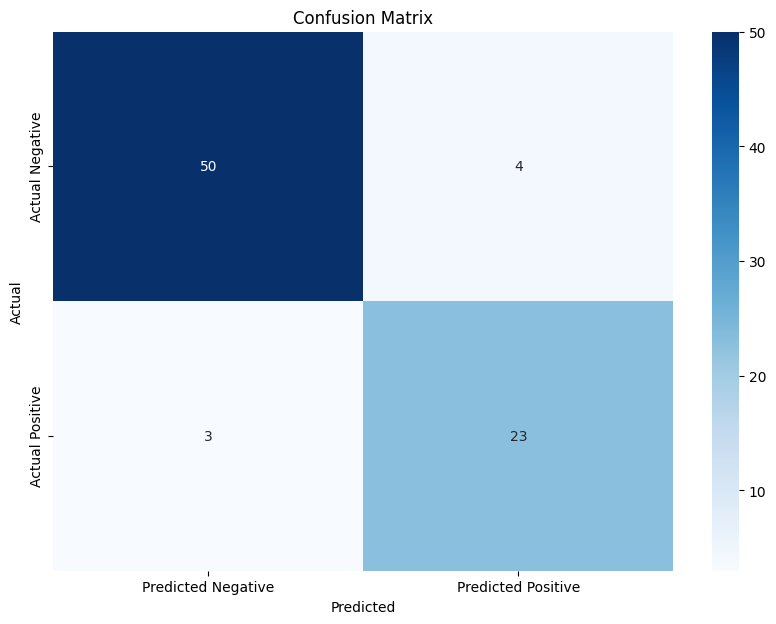

In [61]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [62]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        54
           1       0.85      0.88      0.87        26

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80

